In [41]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
%matplotlib widget

# Práctica 3

## Problema

Se desea obtener un sistema de segundo orden puro que caracterice de forma aproximada el comportamiento dinámico del sistema de suspensión activa visto en el práctico 1. Para esto se realizo una experiencia en la cual se excitó al sistema con una señal $u$ escalón de 1000 N. La salida $y(t)=x_1(t)-x_2(t)$ resultante de está experiencia se salvó en el archivo `experience1.npy`.

En el siguiente bloque se recuperan los datos de esa experiencia:

In [42]:
t,y = np.load('experience1.npy')

La variable $t$ tiene el vector de tiempos de la experiencia e $y$ contiene el vector de salidas de la experiencia.

Se pide:
1. Graficar la salida $y$ respecto del tiempo $t$.
2. Obtener los parámetros $k$, $\omega_n$ frecuencia natural o no amortiguada y $\xi$ (amortiguamiento) del sistema. 
3. Implementar la función transferencia y graficar la repuesta a un escalón de 1000 N al sistema identificado. Superponer en los mismos ejes  con la respuesta obtenida de la experiencia. Sacar conclusiones si es buena o no la aproximación.

**Ayuda**: En este caso particular no es conveniente tratar de obtener directamente $\xi$ de la figura. Se lograrán mejores resultados si se obtienen de la figura $\omega_d$ y $\sigma$ de la figura y mediante las relaciones trigonométricas se obtienen $\omega_n$ y $\xi$.

In [43]:
s=ctrl.tf('s')

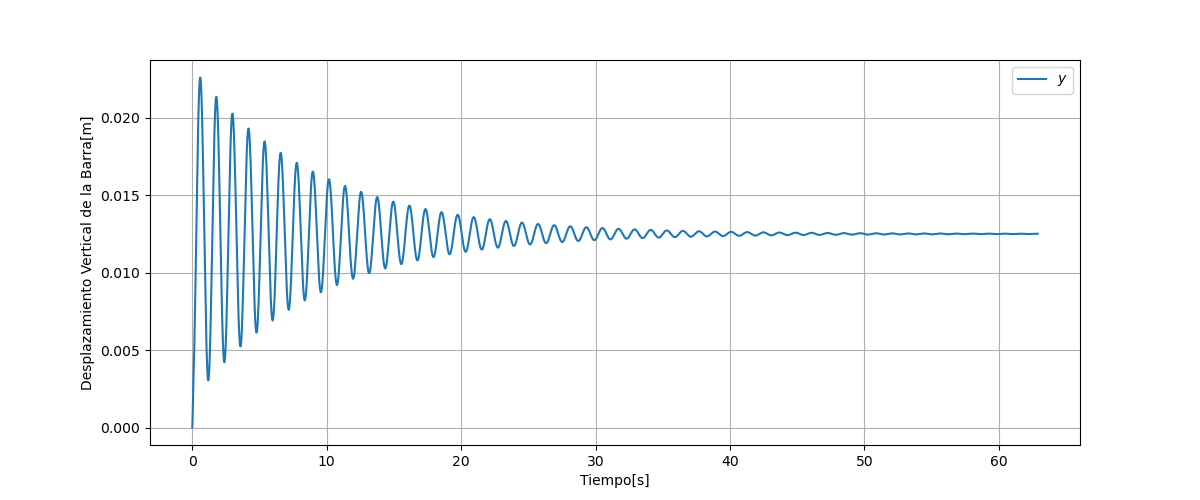

In [44]:
fig, ax=plt.subplots(figsize=(12,5))
ax.plot(t[:], y[:], label=r'$y$')
ax.set_xlabel('Tiempo[s]')
ax.set_ylabel('Desplazamiento Vertical de la Barra[m]')
ax.legend()
ax.grid()

Los parámetros que se extraen de la salida y(t) son:
$$y_{ss} = 0,0125$$

In [45]:
y10p=0.0125*0.1
y10p

0.0012500000000000002

$$y_{10\%}=0,0354$$

In [49]:
y90p=0.0125*0.9
y90p


0.011250000000000001

In [51]:
y2p=0.02*0.0125+0.0125
y2p

0.012750000000000001

$$y_{90\%}=0,2703$$
$$y_{2\%}=0,01275$$
$$t_{r}=0.2578$$
$$t_{p}=0.591$$
$$y_{p}=0,0226$$
$$OS=80,8\%$$
$$Mp=0,808$$

In [8]:
tr= 0.2703-0.0125
tp=0.591
Mp=0.808

$$
\begin{align*}
M_p=exp(\frac{-\pi*\xi}{\sqrt{1-\xi^2}})\\
t_r=\frac{1,8}{\omega_n}\\
t_p=\frac{\pi}{\omega_d}\\
t_{s2\%}=\frac{4}{\sigma}=\frac{1}{\omega_n\xi}\
\end{align*}
$$

In [33]:
xi=0.0677
wn1=1.8/tr
wd=np.pi/tp
t2p=34.1
sigma=4/t2p
wn=np.sqrt(sigma**2+wd**2)

In [34]:
G=1.25E-5*wn**2/(s**2+2*xi*wn*s+wn**2)
G

TransferFunction(array([0.00035338]), array([ 1.        ,  0.7199242 , 28.27067727]))

In [35]:
t2,x=ctrl.step_response(G)

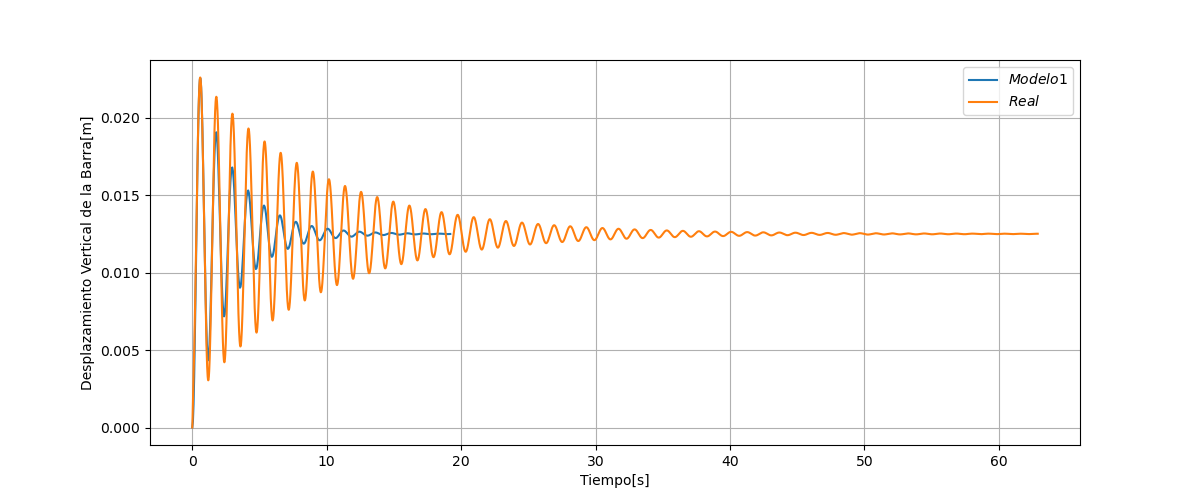

In [36]:
fig, ax=plt.subplots(figsize=(12,5))
ax.plot(t2[:], 1000*x[:], label=r'$Modelo1$')
ax.plot(t[:], y[:], label=r'$Real$')
ax.set_xlabel('Tiempo[s]')
ax.set_ylabel('Desplazamiento Vertical de la Barra[m]')
ax.legend()
ax.grid()


Utilizando un segundo método se calcula el valor de sigma a partir de la envolvente exponencial...


$$
\begin{align*}
y_{63\%} = 0,0125*0,63=7,875E-3\\
y_{envolvente}(t)=1-exp(-\sigma t)\\
t_{63\%} = 7,569=\tau=\frac{1}{\sigma}\\
\sigma=0,132\\
\sigma=\frac{4}{t_{2\%}}=0,118\\
F_d=\frac{1}{T_d}=\frac{1}{1,788-0,591}=0,835\\
\omega_d=2\pi F_d=5,25\\
\omega_n=\sqrt{\sigma^2+\omega_d^2}=5,25\\
\xi=\frac{\sigma}{\omega_n}=0,023\\
\end{align*}
$$



In [55]:

wd2=2*np.pi*0.835
t2p=34.1
sigma2=(0.132+0.118)/2
wn2=np.sqrt(sigma2**2+wd2**2)
xi2=sigma2/wn
H=1.25E-5*wn2**2/(s**2+2*xi2*wn2*s+wn2**2)
H
xi2

0.023509419555264453

In [56]:
t3,x2=ctrl.step_response(H)

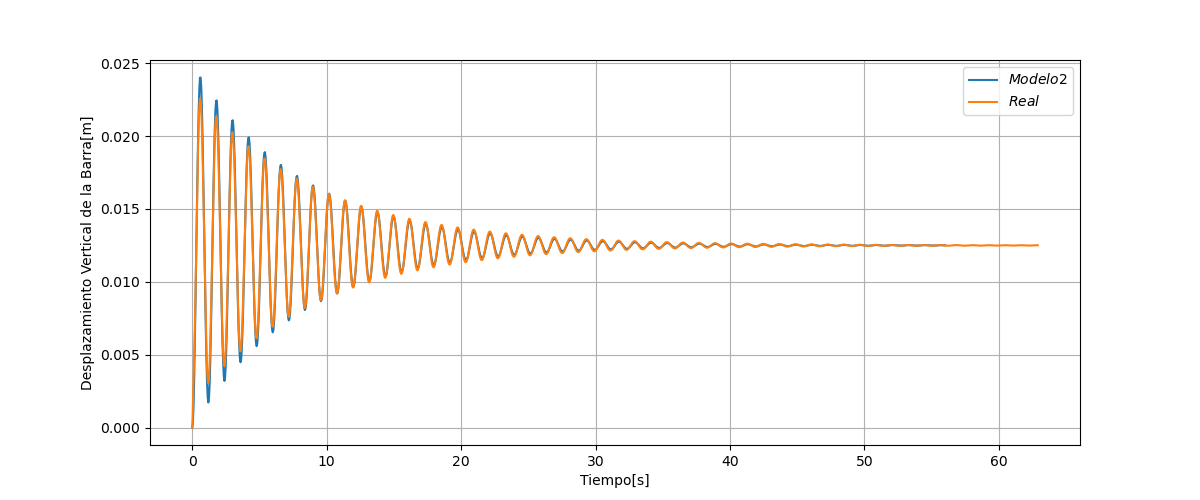

In [57]:
fig, ax=plt.subplots(figsize=(12,5))
ax.plot(t3[:], 1000*x2[:], label=r'$Modelo2$')
ax.plot(t[:], y[:], label=r'$Real$')
ax.set_xlabel('Tiempo[s]')
ax.set_ylabel('Desplazamiento Vertical de la Barra[m]')
ax.legend()
ax.grid()

Comparando los tres modelos


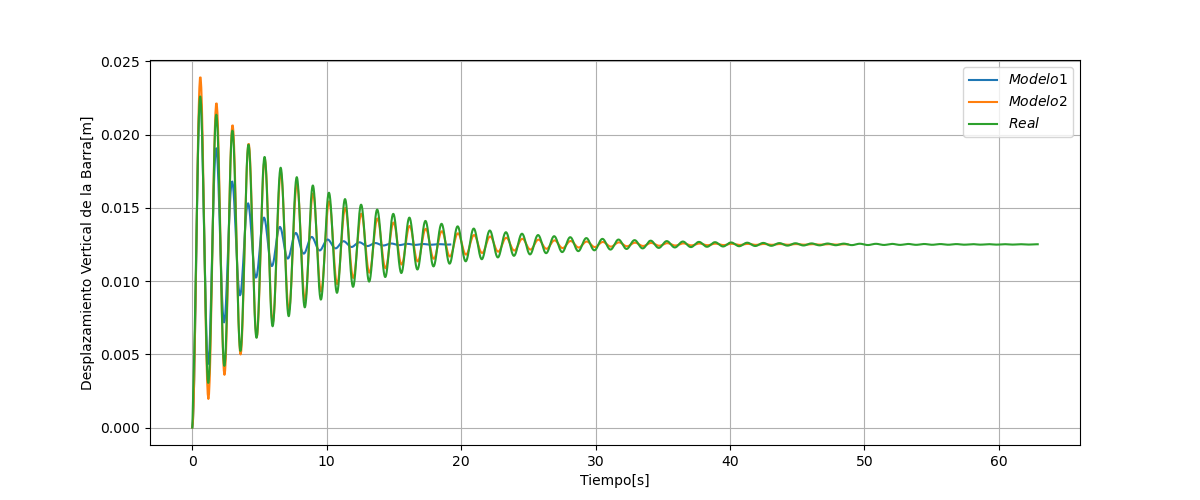

In [40]:
fig, ax=plt.subplots(figsize=(12,5))
ax.plot(t2[:], 1000*x[:], label=r'$Modelo1$')
ax.plot(t3[:], 1000*x2[:], label=r'$Modelo2$')
ax.plot(t[:], y[:], label=r'$Real$')
ax.set_xlabel('Tiempo[s]')
ax.set_ylabel('Desplazamiento Vertical de la Barra[m]')
ax.legend()
ax.grid()

Conclusion: Claramente se obtuvo un mejor modelo a partir del metodo de la envolvente ya que fue posible lograr un mejor ajuste de parametros.